<a href="https://colab.research.google.com/github/sakouhihadil/Technocolabproject/blob/main/EDA__loan_prosper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **EDA of Prosper_Loan**


**Structure of dataset**

>The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
There are two categories :
* **Borrower information**: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
* **Loan performance information**: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc.






In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




> First, i will load the dataset and describe all properties



In [13]:
df =pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv') 
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [14]:
# A concise summary of the dataframe,including the number of non-null valu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss



   1.   # **Data Cleaning**
   There are some elements that need to be fixed, in order to create interesting and trustworthy analyses and visualizations.




In [7]:
df.duplicated().sum()


0

In [9]:
x = df.isnull().sum()
for i in range(len(x)) :
    print( str(i) + "  : " + str(x[i]) )

0  : 0
1  : 0
2  : 0
3  : 84984
4  : 0
5  : 0
6  : 58848
7  : 25
8  : 0
9  : 0
10  : 29084
11  : 29084
12  : 29084
13  : 29084
14  : 29084
15  : 29084
16  : 0
17  : 5515
18  : 3588
19  : 2255
20  : 7625
21  : 0
22  : 0
23  : 100596
24  : 0
25  : 591
26  : 591
27  : 697
28  : 7604
29  : 7604
30  : 697
31  : 0
32  : 0
33  : 697
34  : 1159
35  : 697
36  : 7622
37  : 990
38  : 697
39  : 7604
40  : 7604
41  : 7604
42  : 7544
43  : 7544
44  : 7544
45  : 7544
46  : 8554
47  : 0
48  : 0
49  : 0
50  : 0
51  : 91852
52  : 91852
53  : 91852
54  : 91852
55  : 91852
56  : 91852
57  : 91852
58  : 95009
59  : 0
60  : 96985
61  : 0
62  : 0
63  : 0
64  : 0
65  : 0
66  : 0
67  : 0
68  : 0
69  : 0
70  : 0
71  : 0
72  : 0
73  : 0
74  : 0
75  : 0
76  : 0
77  : 0
78  : 0
79  : 0
80  : 0


In [12]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [36]:
df.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

In [37]:
df.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments",
                "ClosedDate"],inplace= True )

In [38]:
df.dropna(subset=["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)",
"ProsperRating (Alpha)","ProsperScore"],inplace = True)

In [39]:
df["DebtToIncomeRatio"].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [40]:
df["DebtToIncomeRatio"].value_counts()

0.18    3213
0.22    2999
0.17    2749
0.14    2703
0.21    2578
        ... 
1.54       1
3.81       1
4.54       1
1.93       1
2.53       1
Name: DebtToIncomeRatio, Length: 259, dtype: int64

In [41]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].mean,inplace = True)

In [42]:
df.dropna(inplace = True)

In [43]:
df[["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate"]].head()

,ListingCreationDate,FirstRecordedCreditLine,LoanOriginationDate
1,2014-02-27 08:28:07.900000000,1996-03-18 00:00:00,2014-03-03 00:00:00
3,2012-10-22 11:02:35.010000000,1983-02-28 00:00:00,2012-11-01 00:00:00
4,2013-09-14 18:38:39.097000000,2004-02-20 00:00:00,2013-09-20 00:00:00
5,2013-12-14 08:26:37.093000000,1973-03-01 00:00:00,2013-12-24 00:00:00
6,2013-04-12 09:52:56.147000000,2000-09-29 00:00:00,2013-04-18 00:00:00


In [45]:
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].str.extract(r"^(\w+)")
df["LoanOriginationDate"] = df["LoanOriginationDate"].str.extract(r"^(\w+)")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83507 entries, 1 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingCreationDate                 83507 non-null  object 
 1   Term                                83507 non-null  int64  
 2   LoanStatus                          83507 non-null  object 
 3   BorrowerAPR                         83507 non-null  float64
 4   BorrowerRate                        83507 non-null  float64
 5   LenderYield                         83507 non-null  float64
 6   EstimatedEffectiveYield             83507 non-null  float64
 7   EstimatedLoss                       83507 non-null  float64
 8   EstimatedReturn                     83507 non-null  float64
 9   ProsperRating (numeric)             83507 non-null  float64
 10  ProsperRating (Alpha)               83507 non-null  object 
 11  ProsperScore                        8350

# 2. Understanding the data  



#  Loan Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


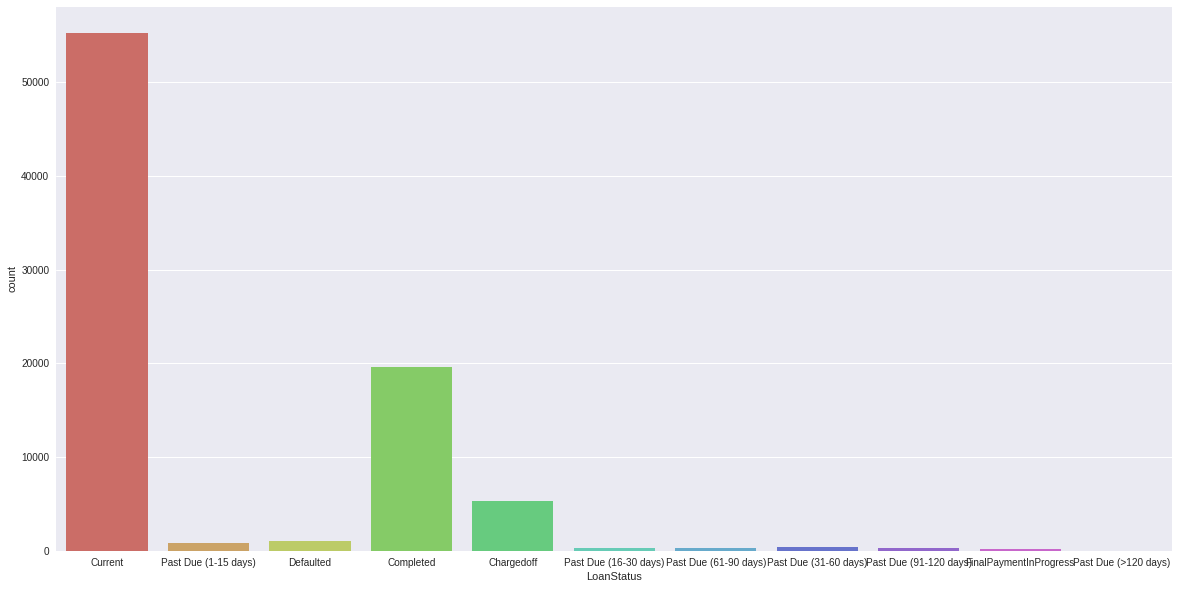

In [47]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["LoanStatus"], palette="hls");



> most loans are still current at the end of this data collection & Some more than the rest are gone



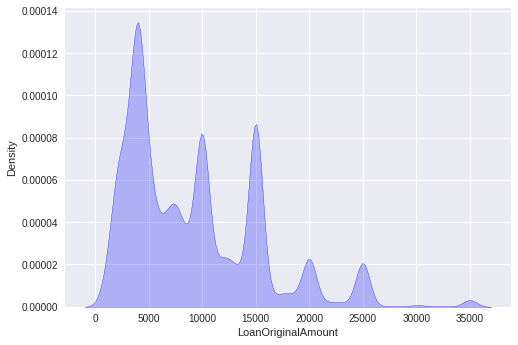

In [48]:
fig = sns.kdeplot(df['LoanOriginalAmount'], shade=True, color="b")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


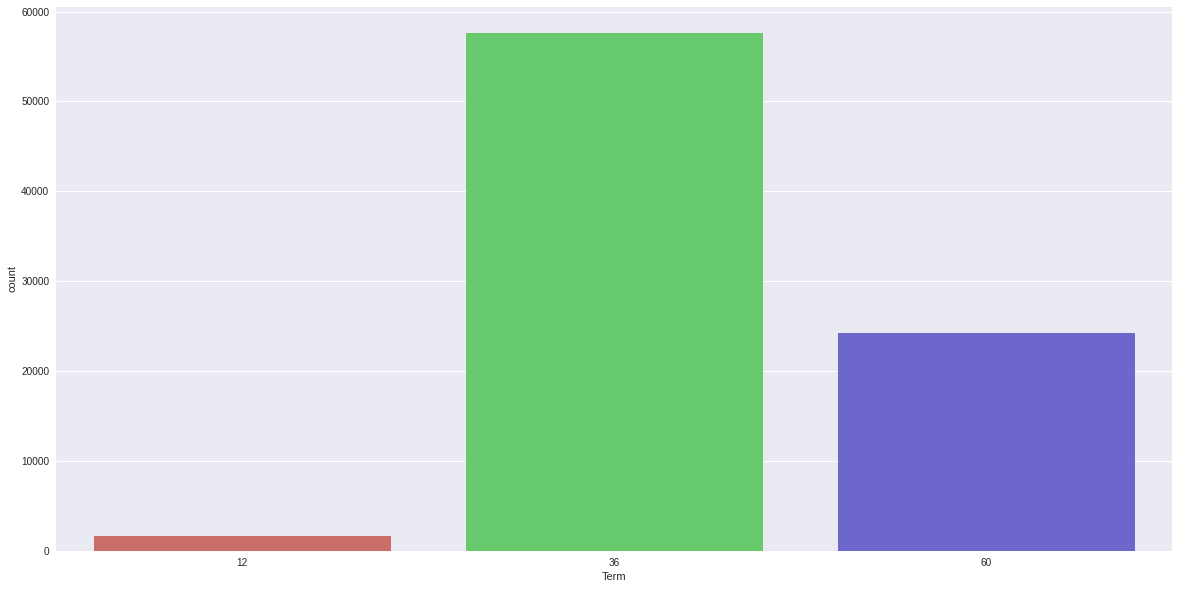

In [49]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["Term"], palette="hls");

Most loans fall within the three-year range, followed by the five-year range

# Financial condition 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


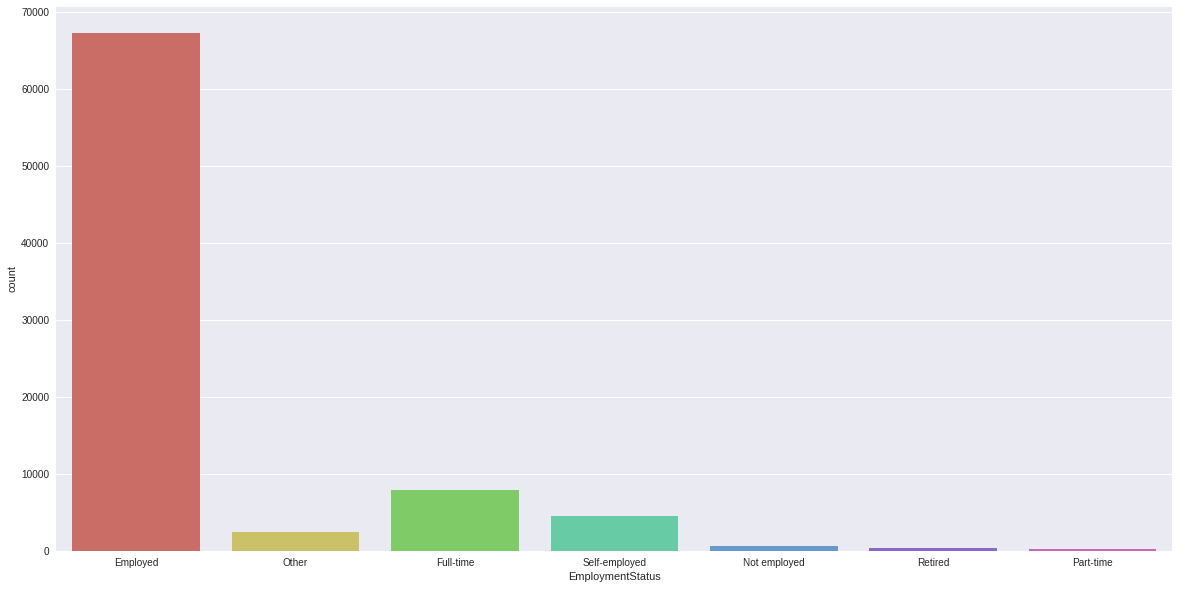

In [50]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["EmploymentStatus"], palette="hls");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


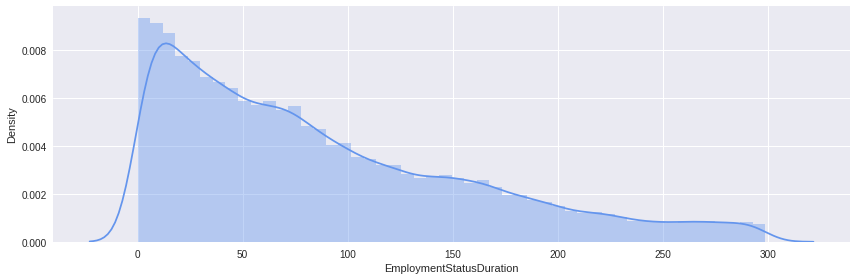

In [51]:
income_df = df.loc[(df['EmploymentStatusDuration'] < 300)  ,['EmploymentStatusDuration']]
x1 = sns.FacetGrid(income_df, height=4, aspect=3)
x1 = x1.map(sns.distplot, 'EmploymentStatusDuration', color='cornflowerblue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


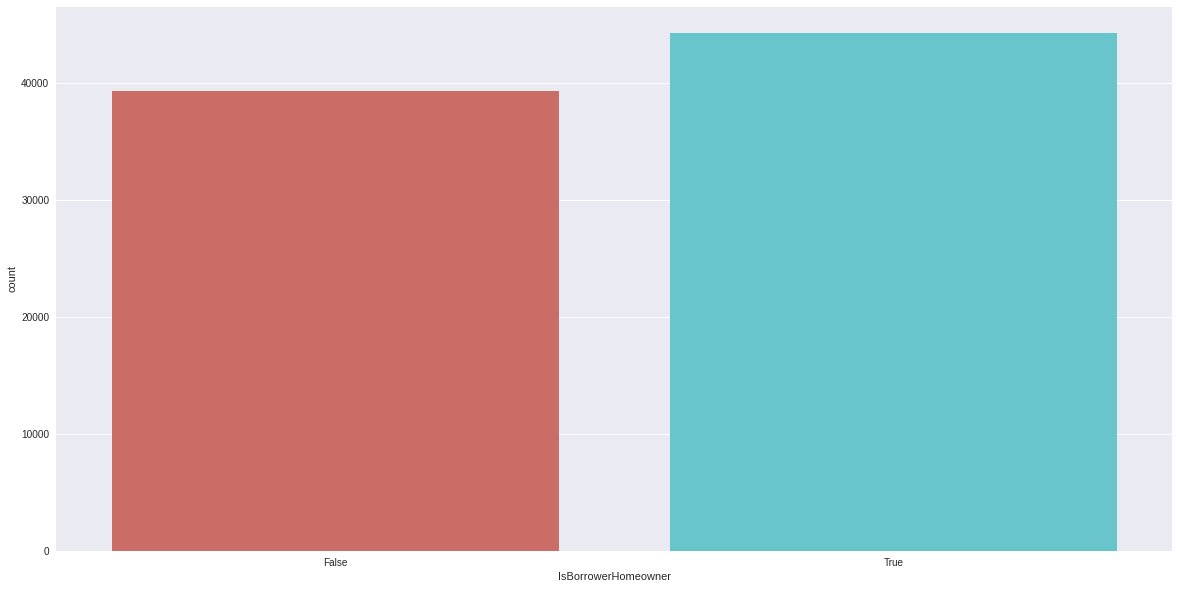

In [52]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df["IsBorrowerHomeowner"], palette="hls");



*   Great people here they have a recognized business
*  About half of the customers do not have home ownership 



The most critical tool in a P2P lending organization is its ability to assess a borrower’s creditworthiness as accurate as possible. Here, I am going to asses the tools used and to see if it is accurate in determining a person’s creditworthiness mainly Credit Grade and Prosper Score



*   **What are the most number of borrowers Credit Grade?**


In [54]:
df_n =pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


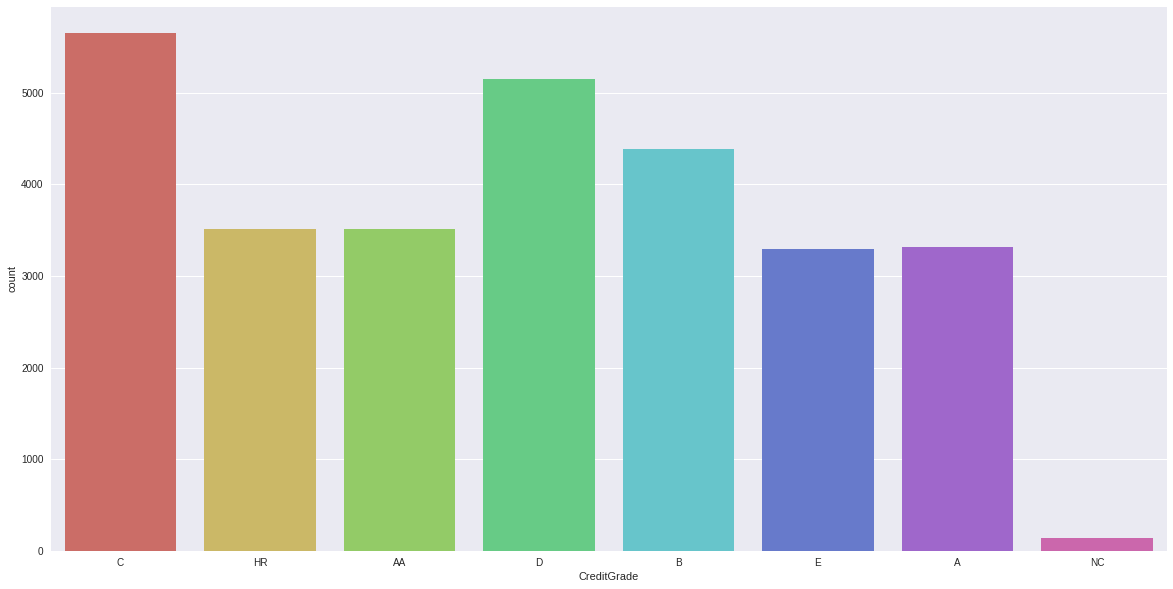

In [55]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df_n["CreditGrade"], palette="hls");

* All results are before 2009 but credit rating seems to be low
* They are not late in paying.. It seems that they are moral 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


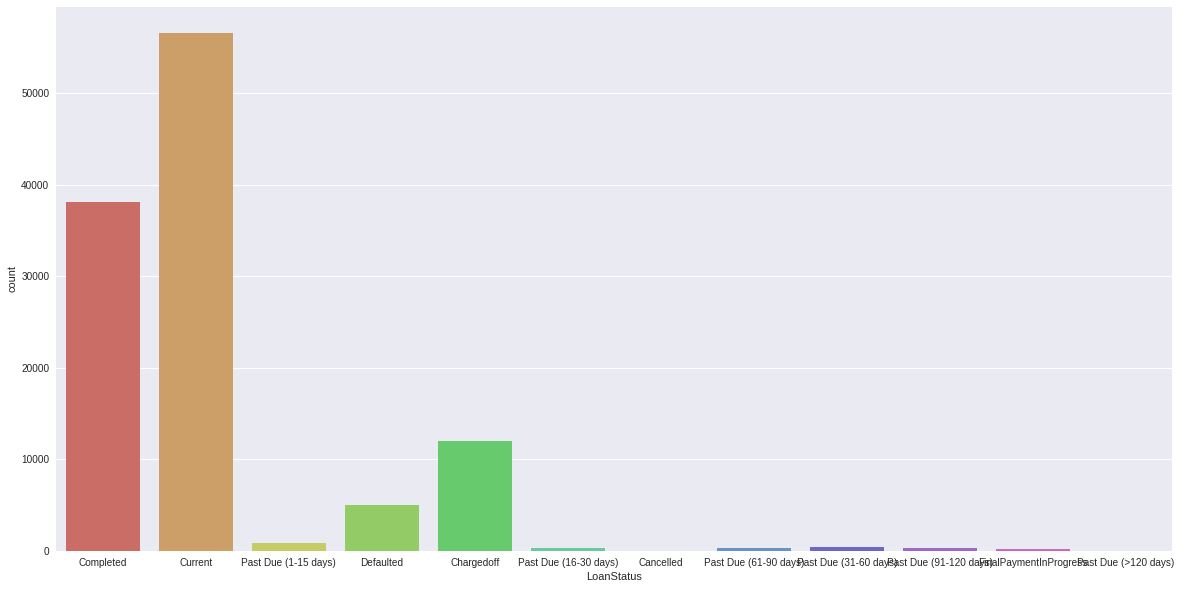

In [56]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df_n["LoanStatus"], palette="hls");

*   Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

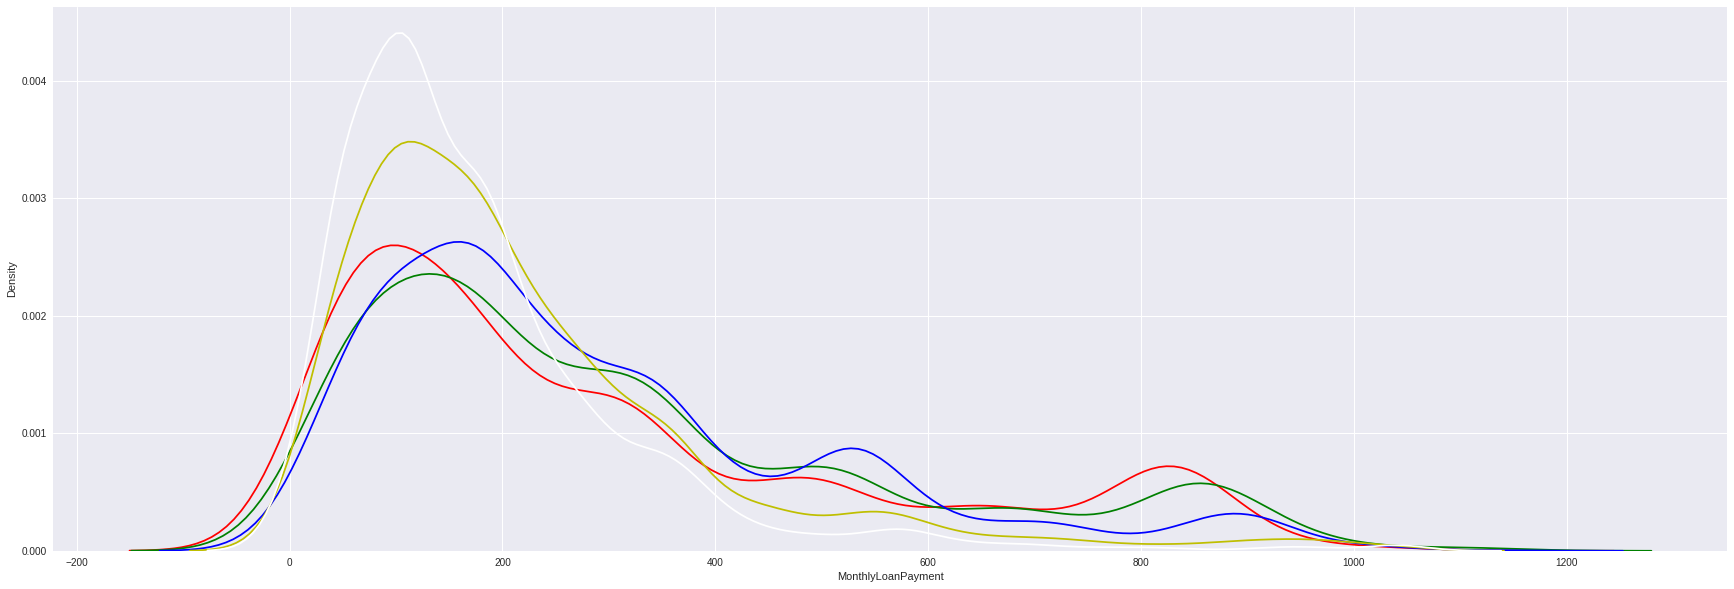

In [57]:
plt.figure(figsize = (30,10))
sns.kdeplot(df_n[df_n['CreditGrade'] == 'AA']['MonthlyLoanPayment'], color='r')
sns.kdeplot(df_n[(df_n['CreditGrade'] == 'A')]['MonthlyLoanPayment'], color='g')
sns.kdeplot(df_n[(df_n['CreditGrade'] == 'B')]['MonthlyLoanPayment'], color='b')
sns.kdeplot(df_n[ (df_n['CreditGrade'] == 'C')]['MonthlyLoanPayment'], color='y')
sns.kdeplot(df_n[(df_n['CreditGrade'] == 'D')]['MonthlyLoanPayment'], color='w')
plt.show()

Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

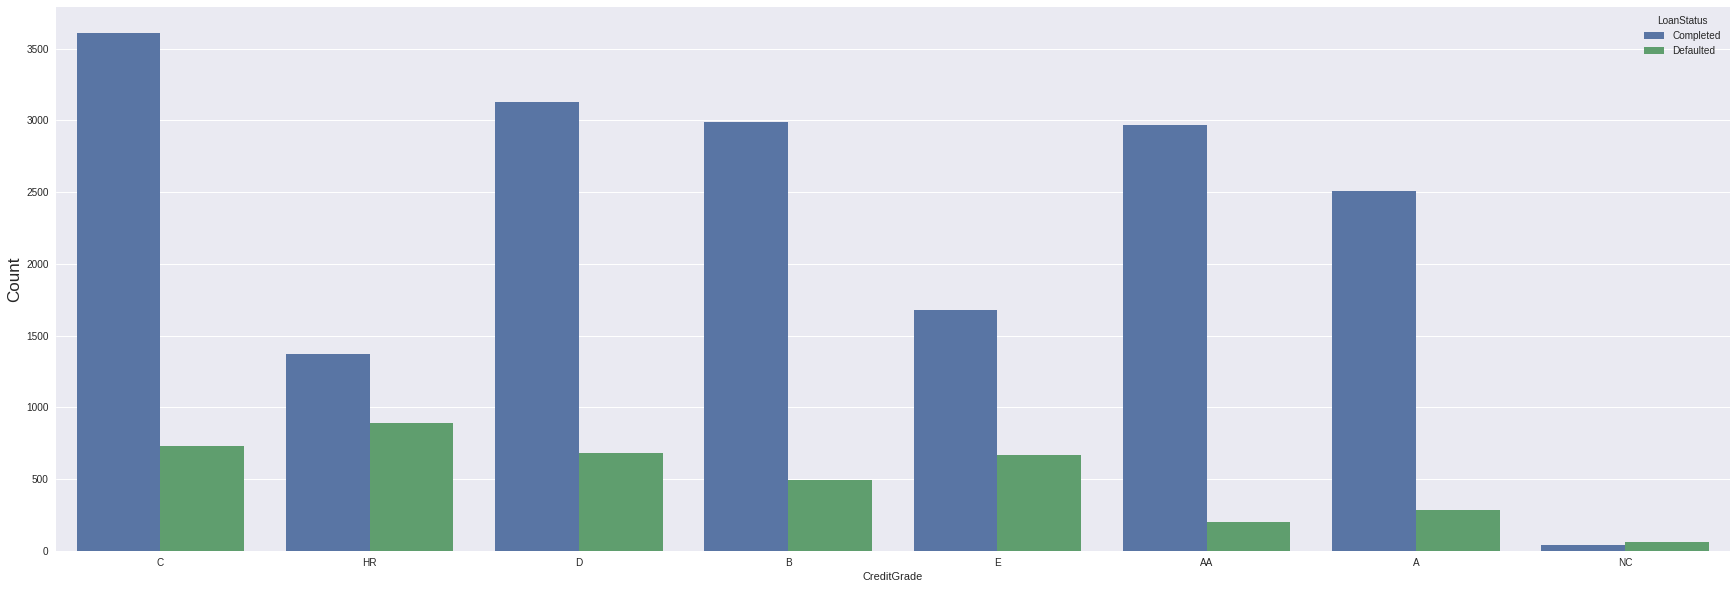

In [59]:
to_show = pd.DataFrame(columns = ["LoanStatus","CreditGrade"])
to_show["LoanStatus"] = df_n[(df_n['LoanStatus'] == 'Defaulted') | (df_n['LoanStatus'] == 'Completed') ]['LoanStatus']
to_show["CreditGrade"]=df_n[(df_n['LoanStatus'] == 'Defaulted') | (df_n['LoanStatus'] == 'Completed') ]['CreditGrade']
plt.figure(figsize = (30,10))
ax2 = sns.countplot(hue="LoanStatus", x='CreditGrade', data=to_show )
ax2.set_ylabel("Count", fontsize=17)
plt.show()


now we can see that the delay is not very dependent on the credit score .

Let's see the correlation matrix

In [61]:
df.corr()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1.000000,-0.069277,-0.001311,-0.001278,0.056594,-0.109191,0.152326,0.081321,0.027638,-0.064395,...,-0.205726,0.018295,0.040640,0.042468,-0.013548,-0.016769,-0.030887,-0.032787,-0.016049,0.011206
BorrowerAPR,-0.069277,1.000000,0.993313,0.993314,0.894628,0.949169,0.794191,-0.962227,-0.669519,0.109330,...,0.128017,-0.074398,0.127550,0.126044,0.059861,-0.023849,-0.011728,-0.019504,-0.001206,-0.267532
BorrowerRate,-0.001311,0.993313,1.000000,0.999996,0.894256,0.944882,0.817627,-0.953157,-0.651193,0.103991,...,0.101424,-0.076585,0.136355,0.134839,0.062804,-0.029625,-0.009460,-0.015680,0.001127,-0.245017
LenderYield,-0.001278,0.993314,0.999996,1.000000,0.894317,0.944894,0.817611,-0.953171,-0.651240,0.103998,...,0.101431,-0.076572,0.136356,0.134841,0.062805,-0.029631,-0.009454,-0.015675,0.001129,-0.245062
EstimatedEffectiveYield,0.056594,0.894628,0.894256,0.894317,1.000000,0.796141,0.801671,-0.847204,-0.632780,0.109034,...,0.060348,-0.068800,0.139696,0.138987,0.049125,-0.043381,-0.047175,-0.064309,-0.038411,-0.267624
EstimatedLoss,-0.109191,0.949169,0.944882,0.944894,0.796141,1.000000,0.589958,-0.964112,-0.674370,0.099846,...,0.199876,-0.061356,0.093636,0.092346,0.051251,-0.022786,0.004003,0.009469,0.024662,-0.277567
EstimatedReturn,0.152326,0.794191,0.817627,0.817611,0.801671,0.589958,1.000000,-0.659969,-0.385769,0.091283,...,-0.131838,-0.094168,0.195506,0.193609,0.074835,-0.038878,-0.020758,-0.043888,-0.032329,-0.095814
ProsperRating (numeric),0.081321,-0.962227,-0.953157,-0.953171,-0.847204,-0.964112,-0.659969,1.000000,0.705908,-0.095452,...,-0.213545,0.058483,-0.086596,-0.085413,-0.047087,0.012554,0.004874,0.007819,-0.010519,0.309904
ProsperScore,0.027638,-0.669519,-0.651193,-0.651240,-0.632780,-0.674370,-0.385769,0.705908,1.000000,-0.011027,...,-0.229377,0.020936,-0.026413,-0.026351,-0.018380,-0.018929,0.026146,0.028039,0.002908,0.319994
ListingCategory (numeric),-0.064395,0.109330,0.103991,0.103998,0.109034,0.099846,0.091283,-0.095452,-0.011027,1.000000,...,0.048569,-0.004342,0.016914,0.017066,-0.002212,-0.000757,-0.000637,-0.005063,-0.003443,-0.047060
